In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
AW_data = pd.read_csv('C:/Users/user/Downloads/AW_dataset.csv', sep=',', index_col=0)
AW_data.head()

#Checking for missing data

#for col in AW_data.columns:
#    print(col, pd.isna(AW_data[col]).any())

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,CustomerAge,CustomerAgegr,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,1,0,0,2,137947,89,31,Between 25-45,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,S,0,1,3,3,101141,117,32,Between 25-45,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,1,1,3,3,91945,123,32,Between 25-45,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,S,0,1,0,0,86688,50,29,Between 25-45,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,S,1,4,5,5,92771,95,29,Between 25-45,1


## Exploration to identify better performing model

Target is the AveMonthSpend
To identify
--
1. Understand the relationships between the features and the target or response
2. Identify the features that show a significant difference for training the machine learning model
3. Identify Redudant and Collinear data

In [47]:
AW_data.describe().round(3)

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,CustomerAge,BikeBuyer
count,16404.000,16404.000,16404.000,16404.000,16404.000,16404.000,16404.000,16404.000,16404.000
mean,20240.143,0.674,1.500,0.991,2.005,78129.672,72.391,35.447,0.333
std,5340.371,0.469,1.139,1.514,1.682,39728.383,27.270,11.242,0.471
min,11000.000,0.000,0.000,0.000,0.000,9482.000,22.000,17.000,0.000
25%,15617.750,0.000,1.000,0.000,0.000,47808.750,52.000,27.000,0.000
50%,20231.500,1.000,2.000,0.000,2.000,76125.000,68.000,34.000,0.000
75%,24862.250,1.000,2.000,2.000,3.000,105211.750,84.000,43.000,1.000
max,29482.000,1.000,4.000,5.000,5.000,196511.000,176.000,87.000,1.000


1. There is a wide range of standard deviation amongst the columns, therefore during the machine learning process the data would be scaled

2. The columns mean and median are compared to get a sense on the distribution of the data; right skewed or left skewed. 
    - NumberofCarsOwned leftskewed, 
    - NumberChildrenAtHome, AveMonthSpend rightskewed, 
    - TotalChildren, YearlyIncome,CustomerAge Normally distributed,


In [14]:
AW_data.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
CustomerAge              int64
CustomerAgegr           object
BikeBuyer                int64
dtype: object

In [72]:
# :) - A bit confusing?

#Splitting the dataset between Numeric and Non Numeric
Catfeatures = AW_data.dtypes[AW_data.dtypes==object].index
Numericfeatures = AW_data.dtypes[AW_data.dtypes!=object].index

#feature not needed for the model
remove = ['Title','FirstName','MiddleName', 'LastName','Suffix','AddressLine1',
         'AddressLine2','PostalCode','PhoneNumber','BirthDate']
for i in remove:
    Catfeatures = np.delete(Catfeatures, np.argwhere(Catfeatures == i))
    
for i in ['AveMonthSpend','BikeBuyer','CustomerID']:
    Numericfeatures = np.delete(Numericfeatures, np.argwhere(Numericfeatures == i))

Numericfeatures
#Catfeatures

Index(['CustomerID', 'HomeOwnerFlag', 'NumberCarsOwned',
       'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'CustomerAge'],
      dtype='object')

In [68]:
#Frequency table of the features

def count_unique(AW_data, cols):
    for col in cols:
        print('\n' + col+'\n-----')
        print(AW_data[col].value_counts())

count_unique(AW_data, Catfeatures)


City
-----
London             379
Paris              341
Beaverton          190
Burien             188
Chula Vista        185
Bellingham         183
Concord            183
Berkeley           177
Burbank            174
Beverly Hills      170
Cliffside          169
Burlingame         166
Bremerton          165
Bellflower         164
Berlin             159
Colma              150
Coronado           118
York               104
Shawnee            102
Hamburg            101
Cranbourne         101
Downey             100
Caloundra           98
Geelong             97
El Cajon            97
Sydney              97
Brisbane            96
Goulburn            96
Hervey Bay          95
Langford            94
                  ... 
Charlotte            1
Bluffton             1
Sammamish            1
Branson              1
Branch               1
Clay                 1
Carol Stream         1
Central Valley       1
Clarkston            1
Byron                1
Cedar City           1
Carrollton           1

1. Statistical property of city would be poorly determined for categories poorly represented with low values of 1-4,and would affect the model
2. For Categorical features, Ordinal data types maybe converted to Numeric.
3. Numeric may be converted to categorical features for where they have no ordinal rank meaning

### Visualizing Categorical Data and Discrete Numeric Data

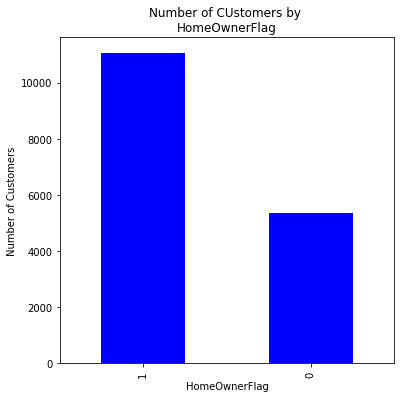

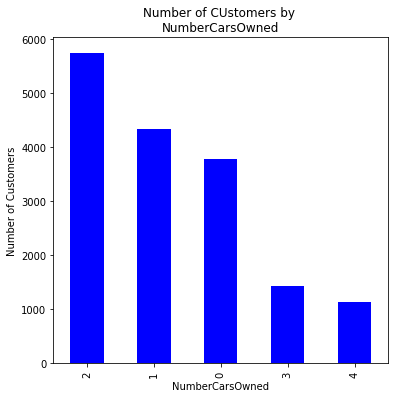

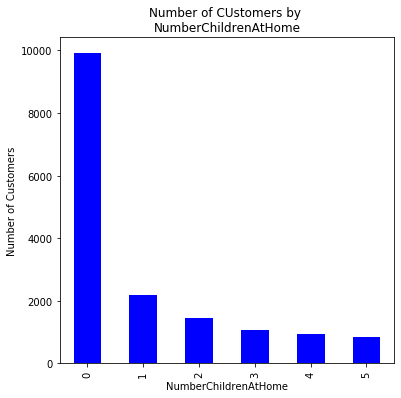

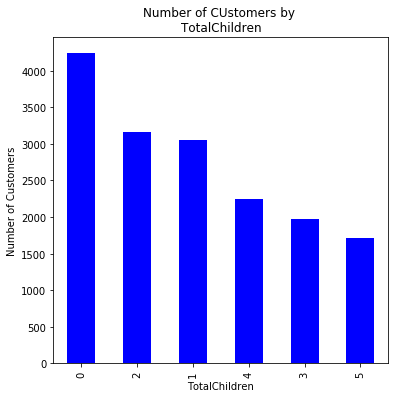

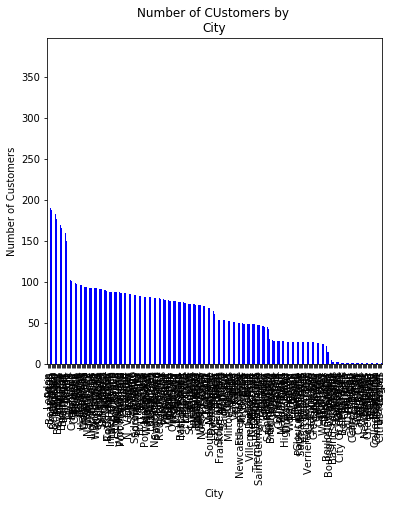

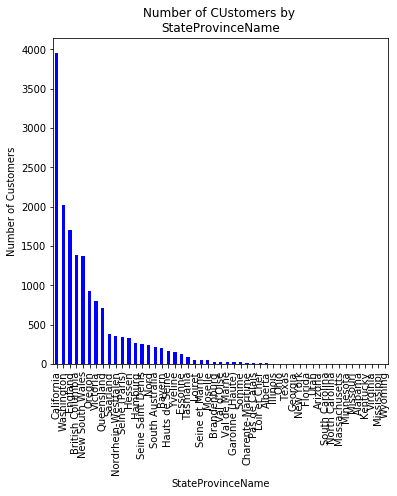

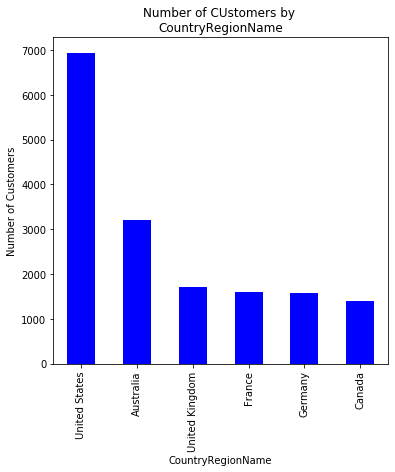

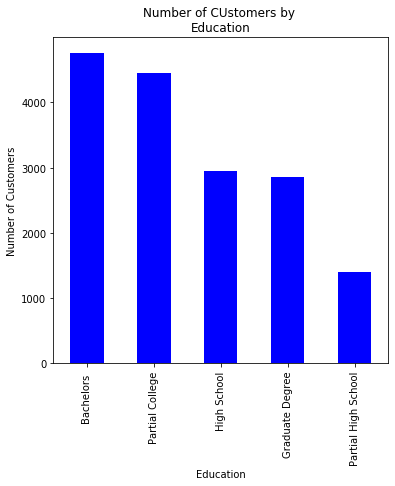

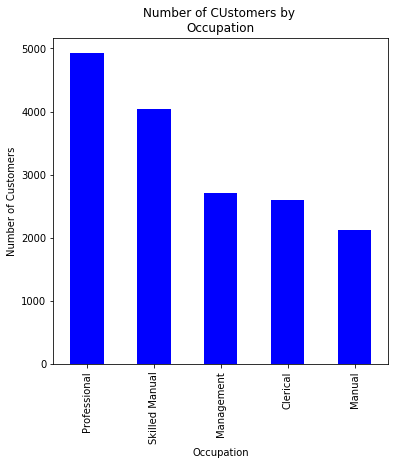

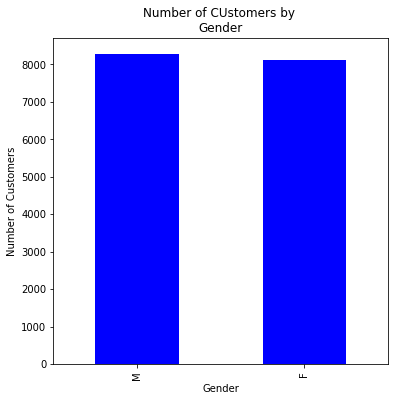

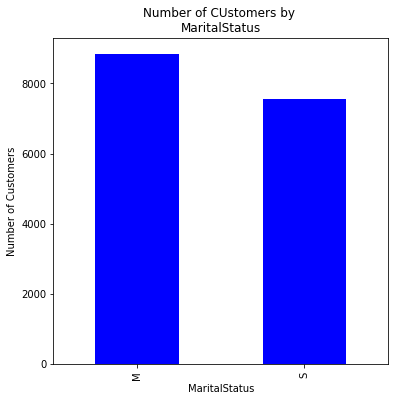

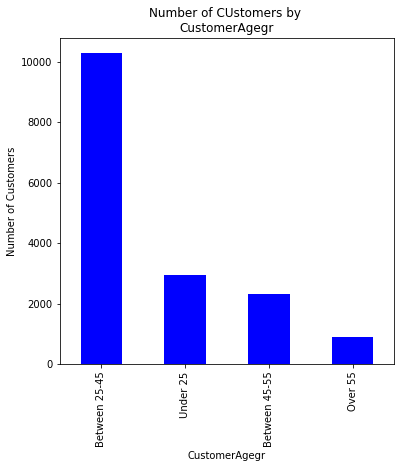

In [75]:
#Bar charts for categorical data
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = auto_prices[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of CUstomers by \n' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()


#1 Use barplot to visualize categorical data and

#2 to visualize discrete Numeric data
plot_cols = ['HomeOwnerFlag', 'NumberCarsOwned','NumberChildrenAtHome', 'TotalChildren','City', 'StateProvinceName', 'CountryRegionName', 'Education','Occupation', 'Gender', 'MaritalStatus', 'CustomerAgegr']
plot_bars(AW_data, plot_cols)    

### Visualizing Continuos Numeric Data

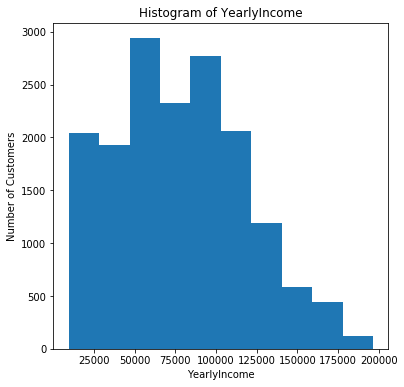

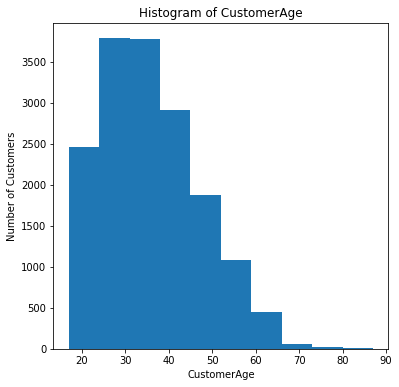

In [76]:
#Use of Histogram to visualize the Numeric continous data
Numeric = ['YearlyIncome', 'CustomerAge']

def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of Customers')# Set text for y axis
        plt.show()
          
plot_histogram(AW_data, Numeric)

The distributions are rightly skewed

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


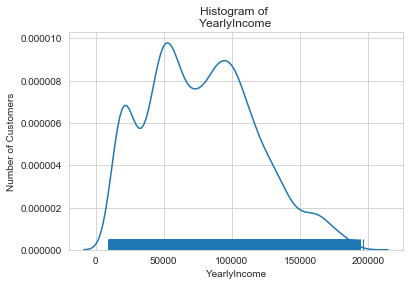

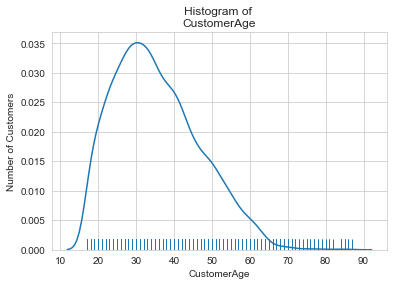

In [77]:
#Use of KDE to further understand the data - KDE(Smoothed Histogram)

def plot_density_hist(auto_prices, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of \n' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of Customers')# Set text for y axis
        plt.show()
        
plot_density_hist(AW_data, Numeric)        




The yearly income has a multi-modal distribution

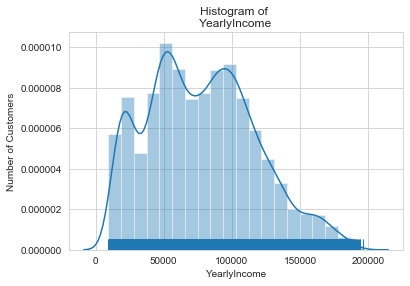

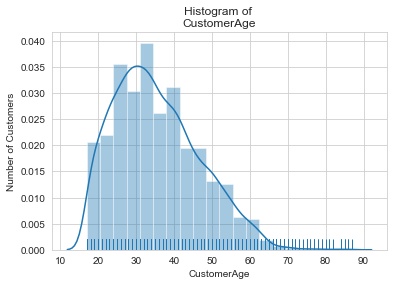

In [80]:
plot_density_hist(AW_data, Numeric, bins = 20, hist = True)        

### Understanding Relationships

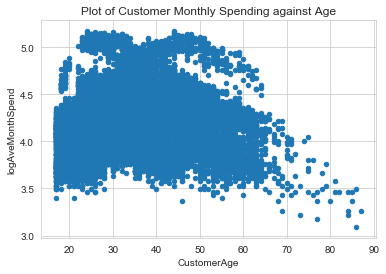

In [109]:
AW_data['logAveMonthSpend'] = np.log(AW_data['AveMonthSpend'].values)
AW_data.plot.scatter(x='CustomerAge',y='logAveMonthSpend')
plt.title('Plot of Customer Monthly Spending against Age')
plt.show()


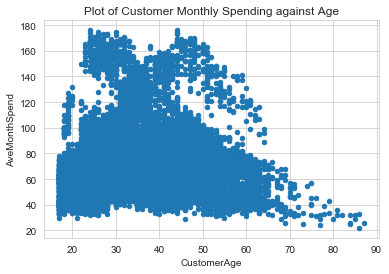

In [82]:
AW_data.plot.scatter(x='CustomerAge',y='AveMonthSpend')
plt.title('Plot of Customer Monthly Spending against Age')
plt.show()

The scatter plot tells us nothing, therefore the problem of overplotting exists sigbificantly. Overplotting reveals information about serious clustering of an Age group over a Average Monthly Spending range

Transparency, Kernel Desnsity, Hexagonal bin plots are used to gain more insight into the dataset

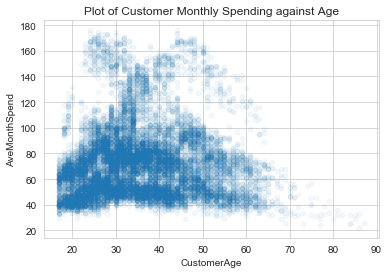

In [87]:
AW_data.plot.scatter(x='CustomerAge',y='AveMonthSpend', alpha=0.05)
plt.title('Plot of Customer Monthly Spending against Age')
plt.show()

Text(0.5, 1, 'Average Month Spend to Customer Age')

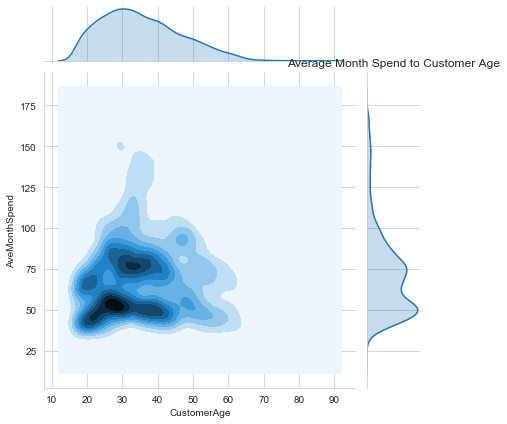

In [90]:
sns.jointplot(x='CustomerAge', y='AveMonthSpend', data=AW_data, kind='kde')
plt.title('Average Month Spend to Customer Age')

Text(0.5, 1, 'Average Month Spend to Customer Age')

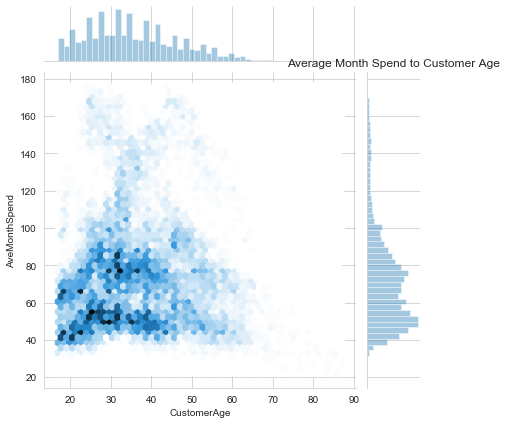

In [91]:
sns.jointplot(x='CustomerAge', y='AveMonthSpend', data=AW_data, kind='hex')
plt.title('Average Month Spend to Customer Age')

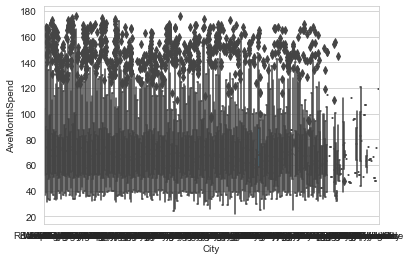

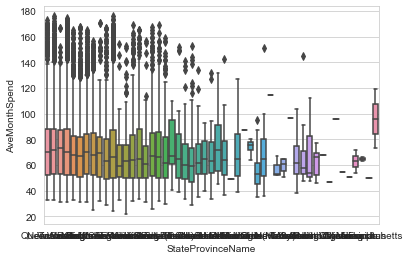

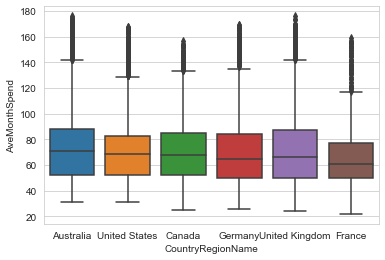

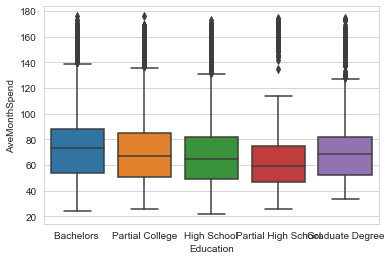

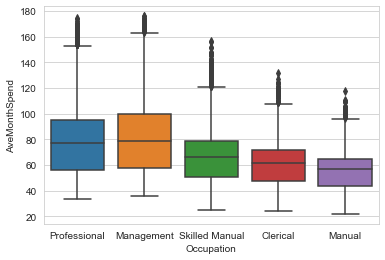

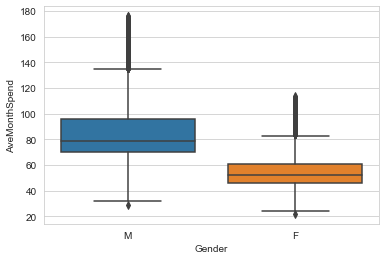

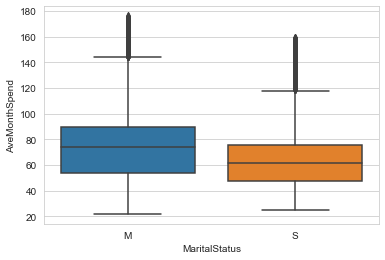

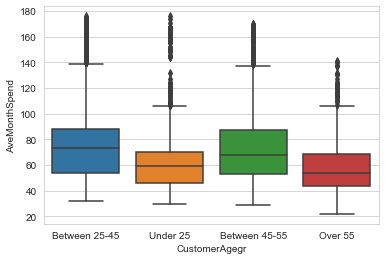

In [92]:
def plot_box(auto_prices, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(AW_data, Catfeatures)    

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


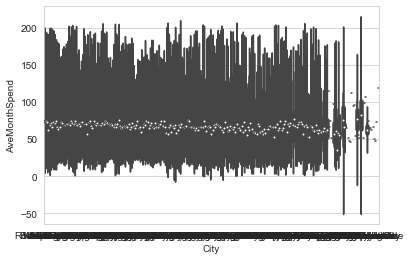

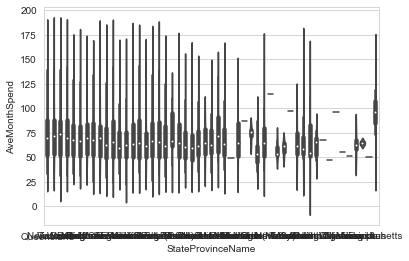

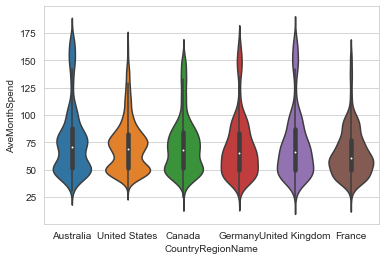

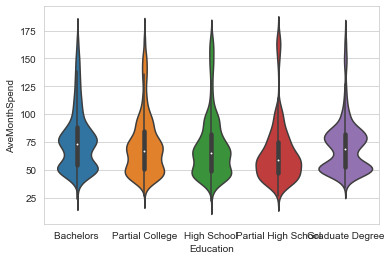

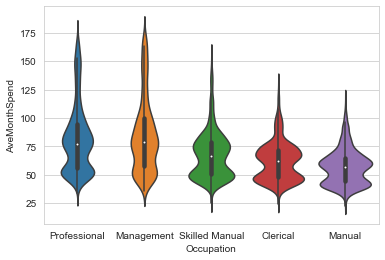

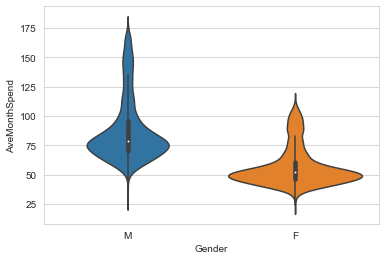

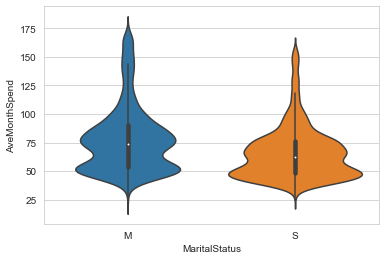

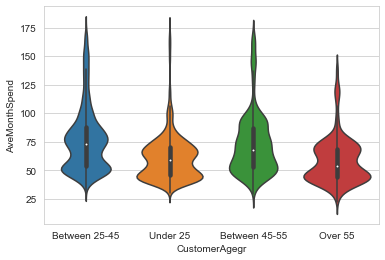

In [93]:
def plot_violin(auto_prices, cols, col_y = 'AveMonthSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(AW_data, Catfeatures)    

## Understanding the data using Conditioned plot

Index(['StateProvinceName', 'CountryRegionName', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'CustomerAgegr'],
      dtype='object')

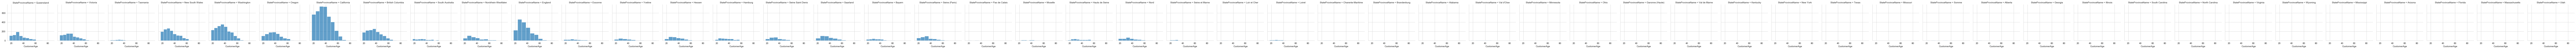

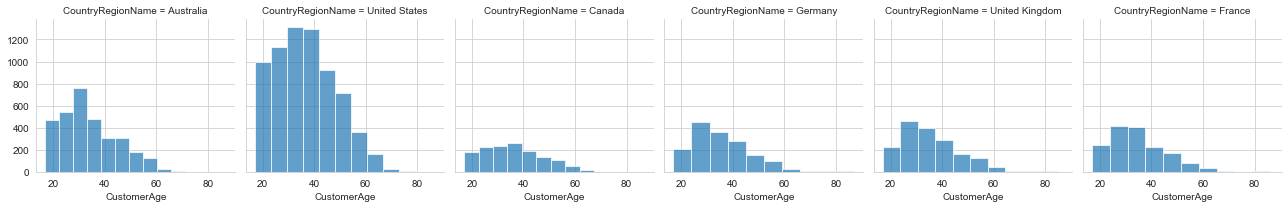

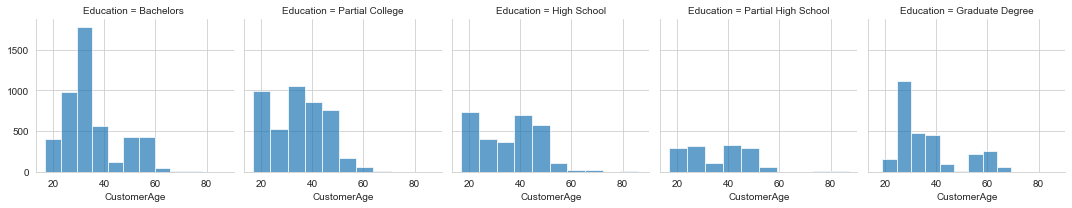

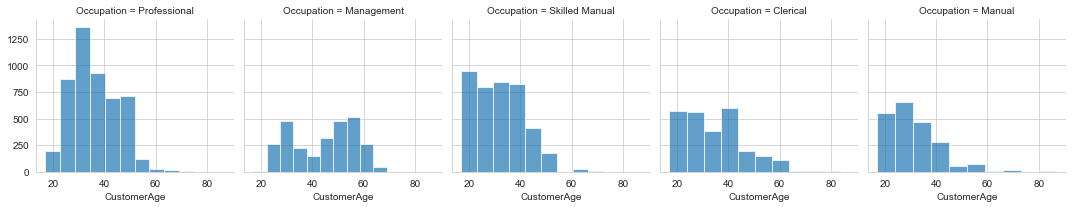

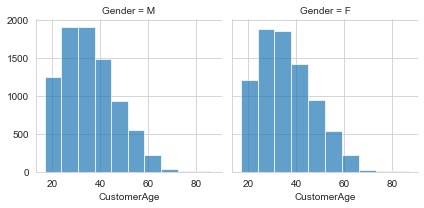

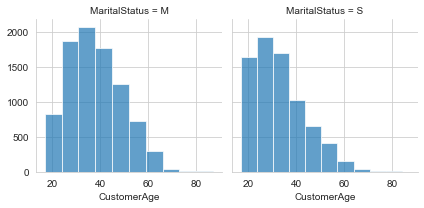

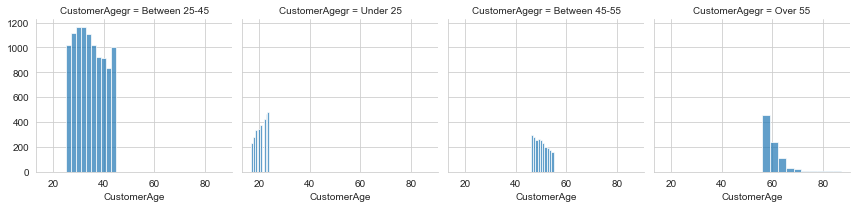

In [104]:
## Function to plot conditioned histograms

def cond_hists(df, plot_col, grid_cols):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in grid_cols:
        grid1 = sns.FacetGrid(df, col=col)
        grid1.map(plt.hist, plot_col, alpha=.7)
    return grid_cols

## Define columns for making a conditioned histogram

cond_hists(AW_data, 'CustomerAge', Catfeatures[1:])

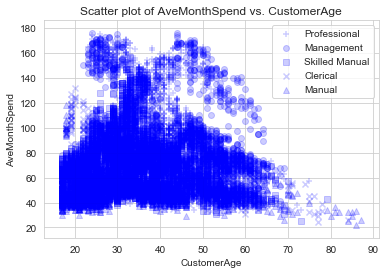

In [97]:
def plot_scatter_shape(auto_prices, cols, shape_col = 'Occupation', col_y = 'AveMonthSpend', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = auto_prices[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = auto_prices[auto_prices[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'blue')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
plot_scatter_shape(AW_data, ['CustomerAge'])                